# Learning algorithms for sparse regression

In many (machine) learning tasks, we have access to a great number of input features, whose impact on the learner's output is in turn controlled by one or more parameters that the learning algorithm must tune. In reality, however, a *sparse* solution, in which the effects of most features are null, is often more useful.

__Contents:__

- <a href="#background">Basic background</a>
- <a href="#coorddesc">Under the squared loss: coordinate descent</a>

Having set up the basic machinery for iterative algorithms in previous lessons, in this lesson we implement procedures which are designed to enforce a certain (controllable) degree of sparseness on the algorithm output.

<a id="background"></a>
## Basic background

In the now-classic words of R. Tibshirani (1996), there are two important reasons for seeking out sparse solutions when we have many parameters (often more than the number of samples). One is *prediction accuracy*:

> _"[Naive estimates] often have low bias but large variance; prediction accuracy can sometimes be improved by shrinking or setting to 0 some coefficients."_

Another reason is is *interpretation*:

> _"With a large number of predictors, we often would like to determine a smaller subset that exhibits the strongest effects."_

Indeed, consider the plethora of stimulus that the human brain encounters in daily activities. Despite the richness of this input, measurement of brain activity reflects a certain degree of "selectivity" towards certain stimulus (image via Haxby et al., 2001):

<img src="img/fmri_response.jpg" alt="Image source: Haxby et al. (2001)" width="480"/>

When statistical learning procedures are carried out by machines, and they have access to a large number of input features, we must take measures to ensure that the solutions they arrive at are sufficiently sparse.

<img src="img/sparse_matrix.png" alt="Image: Sparse matrix image" width="240"/>

While the notion of sparsity is inherently model-dependent, most are formulated such that parameters with a value of $0$ correspond to a certain feature having null impact. Thus, if our parameter vector $w \in \mathbb{R}^{d}$ contains a large number of zeros while performing as desired, then it is a good sparse solution. Most directly, the $\ell_{0}$ norm measures this as

\begin{align*}
\|w\|_{0} = \left|\{j \in [d]: w_{j} \neq 0\}\right|.
\end{align*}

In the risk minimization setting then, where $R(w) = \mathbf{E}_{Z} l(w;z)$, the ideal objective would be something like

\begin{align*}
\min_{w \in \mathbb{R}^{d}} R(w), \quad \text{s.t. } \|w\|_{0} \leq \gamma_{0}.
\end{align*}

This is computationally very challenging, but a rich literature from both the statistics and signal processing communities has demonstrated that one can achieve a small $\ell_{0}$ norm by pursuing a small enough $\ell_{1}$ norm. Changing this condition we get

\begin{align*}
\min_{w \in \mathbb{R}^{d}} R(w), \quad \text{s.t. } \|w\|_{1} \leq \gamma_{1}
\end{align*}

as an ideal routine, and in practice a natural approach is to attempt to minimize

\begin{align*}
L_{\lambda}(w) = \frac{1}{n}\sum_{i=1}^{n} l(w;z_{i}) + \lambda \sum_{j=1}^{d}|w_{j}|.
\end{align*}

It is from this point in our formulation that we begin to dig into specific algorithms.

<a id="coorddesc"></a>
## Coordinate descent

Perhaps the canonical scenario of interest is the "least-squares linear regression" model, namely the setting where

\begin{align*}
l(w;z) = (y-w^{T}x)^{2}, \quad z=(x,y) \in \mathbb{R}^{d+1}.
\end{align*}

The objective function then takes the form

\begin{align*}
L_{\lambda}(w) = \frac{1}{n} \sum_{i=1}^{n} (y_{i}-w^{T}x_{i})^{2} + \lambda\|w\|_{1}.
\end{align*}

An intuitively appealing and computationally straightforward approach to solving this problem is the so-called *coordinate descent* strategy. The underlying idea is extremely simple: __update one parameter at a time__. That's all there is to it.

To derive an explicit update, note that there are (obviously) only two possibilities: with all else fixed, a local minimum is either achieved at $w_j = 0$ or when $w_j \neq 0$. In the former case, it is readily shown that if $w_{j}=0$, the vector $w$ is a local minimum of the convex function $L_{\lambda}(w)$ only when

\begin{align*}
\left| \left.\frac{\partial L_{0}(w)}{\partial w_j}\right|_{w_j = 0} \right| \leq \lambda,
\end{align*}

being sure to note that $L_{0}(\cdot)$ is the *unpenalized* loss function, i.e., $L_{\lambda}(\cdot)$ with $\lambda = 0$. In the latter case, we can take partial derivatives with respect to $w_j$ at $w_j \neq 0$, and we come across the condition

\begin{align*}
\left.\frac{\partial L_{\lambda}(w)}{\partial w_j}\right|_{w_j \neq 0} = 0 \iff \frac{w_{j}}{n}\sum_{i=1}^{n}x_{i,j}^{2} + \lambda \, \text{sign}(w_j) = \frac{1}{n}\sum_{i=1}^{n}\left(y_{i}-\sum_{l \neq j} w_{l}x_{i,l}\right)x_{i,j}.
\end{align*}

Writing

\begin{align*}
V_{j} = \frac{1}{n}\sum_{i=1}^{n}x_{i,j}^{2}
\end{align*}

we have that

\begin{align*}
w_{j} = \frac{1}{n \, V_{j}}\sum_{i=1}^{n}\left(y_{i}-\sum_{l \neq j} w_{l}x_{i,l}\right)x_{i,j} - \frac{\lambda \, \text{sign}(w_j)}{V_{j}}
\end{align*}

is sufficient for $w_{j} \neq 0$ to solve the one-dimensional optimization.

Taking these two cases (and two conditions) together, it is readily confirmed that regardless of which scenario happens to be true, by setting

\begin{align*}
w_{j} = \frac{1}{V_{j}} S(\widetilde{g}_{j};\lambda)
\end{align*}

we guarantee that the desired conditions will be satisfied.

Here,

\begin{align*}
S(u;\gamma) = \text{sign}\,(u)\max\,(|u|-\gamma, 0)
\end{align*}

and

\begin{align*}
\widetilde{g}_{j} = \frac{1}{n} \sum_{i=1}^{n}\left(y_{i}-\sum_{l \neq j} w_{l}x_{i,l}\right)x_{i,j} = -\left.\frac{\partial L_{0}(w)}{\partial w_j}\right|_{w_j = 0}.
\end{align*}

As a final computational detail, if the sample data is standardized to have zero mean and unit standard deviation, then as the relationship between $V_{j}$ and the sample variance is

\begin{align*}
V_{j} = \frac{n-1}{n} \text{var}\,\left\{x_{1,j},\ldots,x_{n,j}\right\},
\end{align*}

it follows that with unit standard deviation, we set $V_{j}=(n-1)/n$ for each $j = 1,\ldots,d$.

In light of our algorithm class definitions in previous lessons, a small modification to the established format allows us to easily implement coordinate descent for least squares, as follows. First, implement the soft threshold function.

In [1]:
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import models
import dataclass

In [2]:
def soft_thres(u,mar):
    '''
    The so-called "soft threshold" function, as made
    popular by the LASSO model and all related
    learning procedures.

    Input "u" will be an array, and "mar" will be the
    margin of the soft-threshold, a non-negative real
    value.
    '''
    return np.sign(u) * np.clip(a=(np.abs(u)-mar), a_min=0, a_max=None)

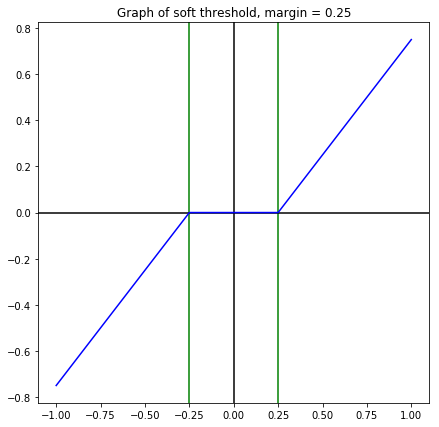

In [3]:
# Quick visualization.

xvals = np.linspace(-1, 1, 500)
marval = 0.25
yvals = soft_thres(u=xvals, mar=marval)

myfig = plt.figure(figsize=(7,7))
ax = myfig.add_subplot(1,1,1)
plt.axvline(x=0.0, color="black")
plt.axvline(x=marval, color="green")
plt.axvline(x=(-marval), color="green")
plt.axhline(y=0.0, color="black")
ax.plot(xvals, yvals, color="blue")
plt.title(("Graph of soft threshold, margin = "+str(marval)))
plt.show()

This `soft_thres` corresponds to $S$ above, with `soft_thres(u,mar)` returning the value corresponding to $S(u;\gamma)$.

Next, we prepare a slightly modified linear least-squares model, which incorporates an $\ell_{1}$ regularization term (with weight $\lambda$ appearing as `lamreg`).

In [4]:
# Model class with per-coordinate gradient computations.

class LinearL1(models.LinReg):
    '''
    Orthodox linear regression model, using squared
    error and regularization via the l1 norm. Good for
    realizing sparsity without giving up convexity.
    '''
    
    def __init__(self, data=None):
        super(LinearL1,self).__init__(data=data)

        
    def l_imp(self, w, X, y, lamreg=None):
        '''
        Input:
        w is a (d x 1) matrix of weights.
        X is a (k x numfeat) matrix of k observations.
        y is a (k x 1) matrix of labels in {-1,1}.
        lamreg is a regularization parameter (l2 penalty).

        Output:
        A vector of length k with losses evaluated at k points.
        '''
        if lamreg is None:
            return (y-self.predict(w=w,X=X))**2/2
        else:
            penalty = lamreg * np.abs(w).sum()
            return (y-self.predict(w=w,X=X))**2/2 + penalty

        
    def g_j_imp(self, j, w, X, y, lamreg=None):

        if lamreg is None:
            return (y-self.predict(w=w,X=X))*(-1)*np.take(a=X,
                                                          indices=[j],
                                                          axis=1)
        else:
            penalty = lamreg * np.sign(w[j,0])
            return (y-self.predict(w=w,X=X))*(-1)*np.take(a=X,
                                                          indices=[j],
                                                          axis=1) + penalty
        
    def g_j_tr(self, j, w, data, n_idx=None, lamreg=None):
        if n_idx is None:
            return self.g_j_imp(j=j, w=w, X=data.X_tr,
                                y=data.y_tr,
                                lamreg=lamreg)
        else:
            return self.g_j_imp(j=j, w=w, X=data.X_tr[n_idx,:],
                                y=data.y_tr[n_idx,:],
                                lamreg=lamreg)
    
    def g_j_te(self, j, w, data, n_idx=None, lamreg=None):
        if n_idx is None:
            return self.g_j_imp(j=j, w=w, X=data.X_te,
                                y=data.y_te,
                                lamreg=lamreg)
        else:
            return self.g_j_imp(j=j, w=w, X=data.X_te[n_idx,:],
                                y=data.y_te[n_idx,:],
                                lamreg=lamreg)


All that remains, then, is to implement the coordinate descent routine described above.

In [5]:
class Algo_CDL1:
    '''
    Coordinate descent (CD) implementation for minimization
    of the "LASSO" objective, namely the sum of squared errors
    regularized by an l1 penalty.
    '''
    
    def __init__(self, w_init, t_max, lamreg):
        self.w = w_init
        self.t = None
        self.t_max = t_max
        self.lamreg = lamreg
        
    def __iter__(self):
        self.t = 0
        # Shuffle up the indices before starting.
        self.idx = np.random.choice(self.w.size, size=self.w.size, replace=False)
        self.idxj = self.idx[0]
        return self
        
    def __next__(self):
        if self.t >= self.t_max:
            raise StopIteration

    def update(self, model, data):
        
        # Computations related to the update.
        n = data.X_tr.shape[0]
        modidx = (self.t-1) % self.w.size
        self.idxj = self.idx[modidx] # circuits around shuffled coords.
        self.w[self.idxj,0] = 0 # current para, but with jth coord set to zero.
        g_j = -np.mean(model.g_j_tr(j=self.idxj, w=self.w, data=data, lamreg=0))
        g_j = g_j * n / (n-1) # rescale
        
        # Compute the solution to the one-dimensional optimization,
        # using it to update the parameters.
        self.w[self.idxj,0] = soft_thres(u=g_j, mar=self.lamreg)
        
        # Monitor update.
        self.t += 1


The basic structure is very similar to `Algo_GD` and others seen previously. Let's put together a simple table of correspondences to keep things clear:

| `code` | Formal representation |
| ------ | :----------------: |
| `lamreg` | $\lambda$ |
| `idx` | $\{1,2,\ldots,d\}$, shuffled |
| `idxj` | $j \in \{1,\ldots,d\}$ to update |
| `g_j` | $\widetilde{g}_{j}$ |

Note that `t_max` may be *larger* than the number of parameters we have. In this case, we simply start back at the beginning of the shuffled index. This is achieved by `modidx`, which gives the time index modulo $d$. That is, the index cycles over

\begin{align*}
0,1,\ldots,d-1, 0, 1, \ldots, d-1, 0, 1, \ldots
\end{align*}

until `t` reaches `t_max`.

We reiterate that the `model` here is still abstract at this point. All we need is that some appropriate model be passed to the iterator at runtime, which has a method to compute the partial derivatives of a loss for each coordinate.

Mirroring the previous lesson, we start by initializing a model object.

In [6]:
# Initialize model.
mod = LinearL1()

Next we prepare some simulated data, with the following characteristics.

- Source is the Elements of Statistical Learning (ESL2) text, in Figure 3.6 on page 59 (with n=300), and again (with n=100) on page 78 in Figure 3.16.

- A small simulated data set based on a linear regression model with additive noise and a sparse underlying model vector.

- Since most methods we are interested in will center and standardize the data anyways, we shall modify the data at time of generation to have empirical mean of zero and empirical variance of one.

In [7]:
# Data prep, following ESL-II example.
n = 100 # training set size
d = 31 # number of inputs
d0 = 10 # number of *active* inputs
sigma_X = 1.0 # unit variance
corr = 0.85 # pairwise correlation coefficient
sigma_noise = math.sqrt(6.25) # stdev of additive noise
sigma_weights = math.sqrt(0.4) # stdev of randomly generated weights
cov_X = np.zeros(d*d).reshape((d,d)) + corr # prepare cov mtx
np.fill_diagonal(cov_X, sigma_X)

# Set up for a loop over trials.
num_trials = 100
lamval = 1.5
num_loops = 15
t_max = num_loops * d

# Storage for performance metrics.
loss_tr = np.zeros((num_trials,t_max+1), dtype=np.float32)
l0norm = np.zeros((num_trials,t_max+1), dtype=np.uint32)
truedist = np.zeros((num_trials,t_max+1), dtype=np.float32)

In [8]:
for tri in range(num_trials):
    
    #print("Running trial number", tri)
    
    # Initialize learning algorithm.
    w_init = 1*np.random.uniform(size=(d,1))
    
    al = Algo_CDL1(w_init=w_init,
                   t_max=t_max,
                   lamreg=lamval)
    
    # Generate the actual data, including "true" weights.
    wstar = np.zeros(d).reshape((d,1))
    idx_on = np.random.choice(d, size=d0, replace=False)
    wstar[idx_on,:] = np.random.normal(loc=0.0,
                                       scale=sigma_weights,
                                       size=d0).reshape((d0,1))
    X = np.random.multivariate_normal(mean=np.zeros(d), cov=cov_X, size=n)
    noise = np.random.normal(loc=0.0, scale=sigma_noise, size=(n,1))
    y = np.dot(X,wstar) + noise

    # Standardize the inputs to have unit (empirical) variance.
    X = (X-np.mean(X,axis=0)) / np.sqrt(np.var(X,axis=0))
    
    # Prepare the data object.
    data = dataclass.DataSet()
    data.init_tr(X=X, y=y)
    X = None
    y = None
    
    # Iterate the learning algorithm.
    idx = 1
    loss_tr[tri,0] = np.mean(mod.l_tr(w=w_init, data=data, lamreg=lamval))
    l0norm[tri,0] = np.nonzero(w_init)[0].size
    truedist[tri,0] = np.linalg.norm((w_init-wstar))
    for mystep in al:
        al.update(model=mod, data=data)
        # Record performance
        loss_tr[tri,idx] = np.mean(mod.l_tr(w=al.w, data=data, lamreg=lamval))
        l0norm[tri,idx] = np.nonzero(al.w)[0].size
        truedist[tri,idx] = np.linalg.norm((al.w-wstar))
        idx += 1

To start things off, we fix a $\lambda$ value, and observe the trajectories of performance metrics of interest.

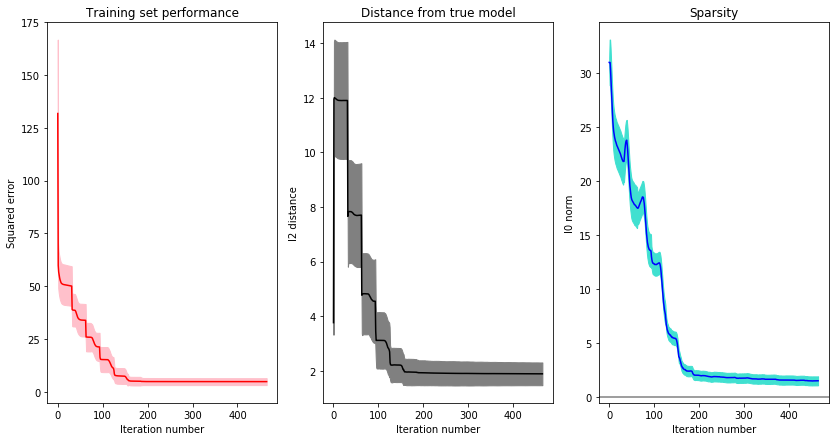

In [9]:
# Visualize the performance trajectories.

tvals = np.arange((t_max+1))

# Average over trials.
myfig = plt.figure(figsize=(14,7))

ax_tr = myfig.add_subplot(1, 3, 1)
loss_ave = np.mean(loss_tr, axis=0)
loss_sd = np.std(loss_tr, axis=0)
plt.fill_between(tvals, loss_ave-loss_sd,
                 loss_ave+loss_sd, color="pink")
ax_tr.plot(tvals, loss_ave, "-", color="red")
plt.ylabel("Squared error")
plt.xlabel("Iteration number")
plt.title("Training set performance")

ax_dist = myfig.add_subplot(1, 3, 2)
dist_ave = np.mean(truedist, axis=0)
dist_sd = np.std(truedist, axis=0)
plt.fill_between(tvals, dist_ave-dist_sd,
                 dist_ave+dist_sd, color="gray")
ax_dist.plot(tvals, dist_ave, "-", color="black")
plt.ylabel("l2 distance")
plt.xlabel("Iteration number")
plt.title("Distance from true model")

ax_spar = myfig.add_subplot(1, 3, 3)
spar_ave = np.mean(l0norm, axis=0)
spar_sd = np.std(l0norm, axis=0)
plt.fill_between(tvals, spar_ave-dist_sd,
                 spar_ave+dist_sd, color="turquoise")
ax_spar.plot(tvals, spar_ave, "-", color="blue")
plt.axhline(y=0, color="gray")
plt.ylabel("l0 norm")
plt.xlabel("Iteration number")
plt.title("Sparsity")

plt.show()


There are clearly a few important variables to focus on here:

- `n`: the sample size

- `d`: the number of parameters

- `d0`: the number of active parameters

- `t_max`: the number of iterations

- `lamreg`: the weight $\lambda$ controlling the $\ell_{1}$-regularization term

- `sigma_noise`: intensity additive noise

__Exercises:__

0. Try modifying the $\lambda$ parameter for the above experiment, by adjusting the `lamreg` argument passed to `Algo_CDL1`. Start with a small value like $\lambda=0.01$, and work up to large values like $\lambda=5$. How does the final output change?

0. What sort of relationship exists between the $\lambda$ parameter value and the $\ell_{1}$ constraint placed on the estimate $w$?

___

It is difficult to know what sort of value $\lambda$ should take in advance, and it is typical to try running the algorithm on the same data, over a "grid" of candidate $\lambda$. In this setting, it is typical to make use of "warm starts", where estimates based on previous $\lambda$ choices are re-used as initial values for subsequent $\lambda$ choices. The terminology is natural: while for the first run the initial value will likely be rather arbitrary, after running `t_max` iterations, the current estimate should be a lot closer to the optimal solution, under the implicitly imposed $\ell_{1}$ norm constraints.


Implementing this in practice is simple. In the following example, we prepare a grid of candidates (`todo_lambda`), and after each run update the initial weights `w_init` to the most recent estimate `w_est`.

In [10]:

# Data prep, following ESL-II example.
n = 100 # training set size
d = 31 # number of inputs
d0 = 10 # number of *active* inputs
sigma_X = 1.0 # unit variance
corr = 0.85 # pairwise correlation coefficient
sigma_noise = math.sqrt(6.25) # stdev of additive noise
sigma_weights = math.sqrt(0.4) # stdev of randomly generated weights
cov_X = np.zeros(d*d).reshape((d,d)) + corr # prepare cov mtx
np.fill_diagonal(cov_X, sigma_X)

# Set up for a loop over trials and lambda values.
num_trials = 100
todo_lambda = np.logspace(start=math.log10(1/100), stop=math.log10(2.5), num=150)
num_loops = 15
t_max = num_loops * d

# Storage for performance metrics.
loss_tr = np.zeros((num_trials,todo_lambda.size), dtype=np.float32)
l0norm = np.zeros((num_trials,todo_lambda.size), dtype=np.uint32)
truedist = np.zeros((num_trials,todo_lambda.size), dtype=np.float32)


In [11]:
for tri in range(num_trials):
    
    # Initialize learning algorithm.
    w_init = 1*np.random.uniform(size=(d,1))
    
    for l in range(todo_lambda.size):
        
        lamval = todo_lambda[l]
        
        # Use warm starts when available.
        if l > 0:
            w_init = al.w

        al = Algo_CDL1(w_init=w_init,
                       t_max=t_max,
                       lamreg=lamval)
    
        # Generate the actual data, including "true" weights.
        wstar = np.zeros(d).reshape((d,1))
        idx_on = np.random.choice(d, size=d0, replace=False)
        wstar[idx_on,:] = np.random.normal(loc=0.0,
                                           scale=sigma_weights,
                                           size=d0).reshape((d0,1))
        X = np.random.multivariate_normal(mean=np.zeros(d), cov=cov_X, size=n)
        noise = np.random.normal(loc=0.0, scale=sigma_noise, size=(n,1))
        y = np.dot(X,wstar) + noise

        # Standardize the inputs to have unit (empirical) variance.
        X = (X-np.mean(X,axis=0)) / np.sqrt(np.var(X,axis=0))

        # Prepare the data object.
        data = dataclass.DataSet()
        data.init_tr(X=X, y=y)
        X = None
        y = None
    
        # Iterate the learning algorithm.
        for mystep in al:
            al.update(model=mod, data=data)
        
        # Record performance based on final output.
        loss_tr[tri,l] = np.mean(mod.l_tr(w=al.w, data=data, lamreg=lamval))
        l0norm[tri,l] = np.nonzero(al.w)[0].size
        truedist[tri,l] = np.linalg.norm((al.w-wstar))
        

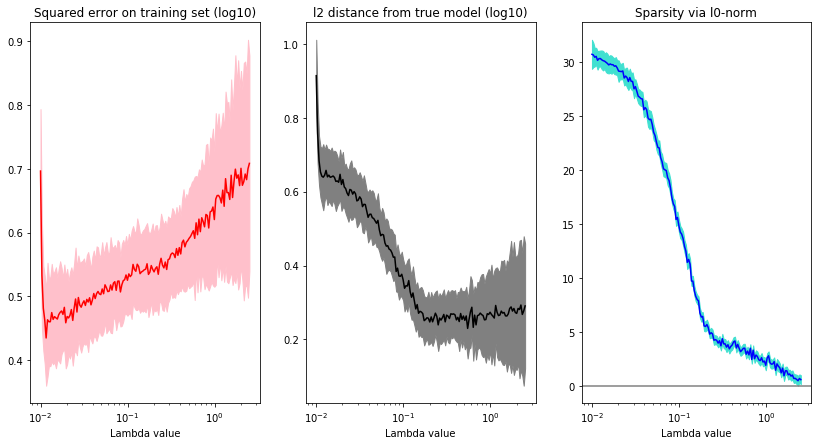

In [12]:
# Visualize the performance over lambda grid.

# Average over trials.
myfig = plt.figure(figsize=(14,7))

ax_tr = myfig.add_subplot(1, 3, 1)
ax_tr.set_xscale('log')
loss_ave = np.mean(loss_tr, axis=0)
loss_sd = np.std(loss_tr, axis=0)
logerr = loss_sd / (math.log(10)*loss_ave) # for error bars when using log scale
plt.fill_between(todo_lambda, np.log10(loss_ave)-logerr,
                 np.log10(loss_ave)+logerr, color="pink")
ax_tr.plot(todo_lambda, np.log10(loss_ave), "-", color="red")
plt.xlabel("Lambda value")
plt.title("Squared error on training set (log10)")

ax_dist = myfig.add_subplot(1, 3, 2)
ax_dist.set_xscale('log')
dist_ave = np.mean(truedist, axis=0)
dist_sd = np.std(truedist, axis=0)
logerr = loss_sd / (math.log(10)*loss_ave) # for error bars when using log scale
plt.fill_between(todo_lambda, np.log10(dist_ave)-logerr,
                 np.log10(dist_ave)+logerr, color="gray")
ax_dist.plot(todo_lambda, np.log10(dist_ave), "-", color="black")
plt.xlabel("Lambda value")
plt.title("l2 distance from true model (log10)")

ax_spar = myfig.add_subplot(1, 3, 3)
ax_spar.set_xscale('log')
spar_ave = np.mean(l0norm, axis=0)
spar_sd = np.std(l0norm, axis=0)
plt.fill_between(todo_lambda, spar_ave-dist_sd,
                 spar_ave+dist_sd, color="turquoise")
ax_spar.plot(todo_lambda, spar_ave, "-", color="blue")
plt.axhline(y=0, color="gray")
plt.xlabel("Lambda value")
plt.title("Sparsity via l0-norm")

plt.show()


Note the following points here:

- Taking a larger $\lambda$ value indeed leads to sparser solutions; a larger value implicitly specifies tigher $\ell_{1}$ (and $\ell_{0}$) norm constraints.

- There is a clear tradeoff between __bias__ and __variance__ of the learning algorithm here. Too tight a constraint means that the correct solution may not be in the feasible region, a bias. Too loose a constraint leaves too many parameters to specify given relatively few observations, large variance over the random draw of the sample.

- Note that the best distance is achieved, on average, at the "correct" sparsity level (i.e., the level matching the underlying $w^{\ast}$, which is precisely the behaviour that we should expect.

__Exercises:__

0. In the above example, we start with *small* $\lambda$ values and work up to larger values, utilizing warm starts along the way. Try reversing the order (starting large). Does the best lambda value tend to change depending on the direction?

0. Try running the algorithm "fresh" for each new $\lambda$ candidate, without using warm starts (i.e., use the same pre-fixed `w_init` every time). Does performance degrade? Does the optimal $\lambda$ value change?

0. One common strategy for constructing the grid is to set the sequence $(\lambda_{0},\ldots,\lambda_{k})$ such that the values are evenly spaced on a log scale, i.e., $\log\lambda_{i} - \log\lambda_{i-1} = c > 0$, a constant for all $i$. Extend the above code such that the minimum and maximum parameter values take the following standard values (Bühlmann, and Van De Geer, 2011): writing $x_{(j)}$ for the $j$th column of the design matrix, $x_{(j)} = (x_{1,j},\ldots,x_{n,j})$, and $y=(y_{1},\ldots,y_{n})$,
<br><br>
\begin{align*}
\lambda_{0} = 1/n, \quad \lambda_{k} = \max \left\{|\langle y, x_{(j)}\rangle|/n:j=1,\ldots,d \right\}.
\end{align*}
<br>
0. How does performance change when more/less loops are carried out?

0. As before, try with and without warm starts, evaluate the change in average performance, variance over trials, and the average sparsity of the best estimate.

0. Record the best-performing $\lambda$ values each time, and examine the average and variance of these values over trials. Does there tend to be much sample-sensitive variation in the ideal $\lambda$ setting?

0. Add `w_old`, `thres` and `diff` attributes to `Algo_CDL1`. Every time we carry out `w.size` (that is, $d$) iterations, set `diff` to the norm of the difference between `w` and `w_old`, and then update `w_old` to the current `w`. If `diff` is less than `thres` (a parameter we must set), then terminate.

0. Following the above `thres`-based termination conditions, how many iterations does it typically take to converge? Does this depend on the value of $\lambda$?

0. If we perform many loops, for most of the time many $w_{j}$ values will likely be zero. A different strategy for looping over the indices is to *ignore* all coordinates once they have taken on a zero value. Implement this strategy (re-define `idx` on the fly). How does performance compare with the original circulating approach? What about computation time?

## References:

- Bühlmann, Peter, and Sara Van De Geer. Statistics for high-dimensional data: methods, theory and applications. Springer Science & Business Media, 2011.
- Haxby, James V., et al. "Distributed and overlapping representations of faces and objects in ventral temporal cortex." Science 293.5539 (2001): 2425-2430.

___